## Language detection 

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd


directory = "/Users/feliphlvo/Documents/Minerva/2022 Fall/CS156/Naive Bayes for Language Detection/symbol"

A = []
B = []
C = []
for file in os.listdir(directory):
    if file.startswith("language-training-lang"):
        if "A" in file:
            # open file
            f = open(os.path.join(directory, file), "r")
            # read file
            A.append(f.read())
        elif "B" in file:
            # open file
            f = open(os.path.join(directory, file), "r")
            B.append(f.read())
        elif "C" in file:
            # open file
            f = open(os.path.join(directory, file), "r")
            C.append(f.read())
    else:
        continue


# importing the test data

tests = []
for file in os.listdir(directory):
    if file.startswith("language-test"):
        # open file
        f = open(os.path.join(directory, file), "r")
        # read file
        tests.append(f.read())
    else:
        continue

In [2]:
# Calculating transition probabilities
language_dict = {"A": A, "B": B, "C": C}
transition_prob_dict = {"A": {}, "B": {}, "C": {}}
for language in language_dict:
    for text in language_dict[language]:
        for i in range(len(text)-1):
            if text[i] in transition_prob_dict[language]:
                if text[i+1] in transition_prob_dict[language][text[i]]:
                    transition_prob_dict[language][text[i]][text[i+1]] += 1
                else:
                    transition_prob_dict[language][text[i]][text[i+1]] = 1
            else:
                transition_prob_dict[language][text[i]] = {text[i+1]: 1}

# changing count to probabilities
for language in transition_prob_dict:
    for key in transition_prob_dict[language]:
        total = sum(transition_prob_dict[language][key].values())
        for key2 in transition_prob_dict[language][key]:
            transition_prob_dict[language][key][key2] = transition_prob_dict[language][key][key2]/total
            

In [3]:
# Calculating the probability of each test
def calculate_prob(test, transition_prob_dict):
    prob_dict = {}
    for language in transition_prob_dict:
        prob = 1
        for i in range(len(test)-1):
            if test[i] in transition_prob_dict[language]:
                if test[i+1] in transition_prob_dict[language][test[i]]:
                    prob *= transition_prob_dict[language][test[i]][test[i+1]]
                else:
                    prob *= 0
            else:
                prob *= 0
        prob_dict[language] = prob
    # Get normalized probabilities
    total = sum(prob_dict.values())
    for language in prob_dict:
        prob_dict[language] = prob_dict[language]/total

    return prob_dict


for i in range(len(tests)):
    print(f"Test {i+1}: {calculate_prob(tests[i], transition_prob_dict)}")

Test 1: {'A': 3.361094457359659e-46, 'B': 1.0, 'C': 6.1761882113553754e-59}
Test 2: {'A': 1.0, 'B': 0.0, 'C': 1.3215362632442147e-46}
Test 3: {'A': 1.0, 'B': 0.0, 'C': 1.152741198112809e-39}
Test 4: {'A': 1.0, 'B': 0.0, 'C': 1.0125511501997785e-34}
Test 5: {'A': 1.0, 'B': 0.0, 'C': 7.480114916701208e-42}
Test 6: {'A': 5.256563173673131e-61, 'B': 0.0, 'C': 1.0}
Test 7: {'A': 1.0, 'B': 0.0, 'C': 1.0243822834611246e-46}
Test 8: {'A': 2.2198377249620095e-81, 'B': 0.0, 'C': 1.0}
Test 9: {'A': 4.627742576668451e-68, 'B': 0.0, 'C': 1.0}
Test 10: {'A': 2.64631587586449e-63, 'B': 1.0, 'C': 4.0497630807527415e-62}


## Speaker Identification

In [4]:
import urllib.request
speech = open("/Users/feliphlvo/Documents/Minerva/2022 Fall/CS156/Naive Bayes for Language Detection/speaker.txt", "r").read()
speech


'eoggeggAeggepgpppoppogopppgoppoopegAAoAAAtAtttooepooppteeeeotpopppeeoepooopopgoooepoepotpoegogggggkeggpogopopeAtAttAoApAtttAggeAgegettttAAAAtoeeggeteoAopopotoktttpoepegpgtgAgAeeppeoooopgeggpAAAAgAtgegogoeepAtAtAAotAAAtttAtkAAAtAAktAAAtttAtAAoAtteeoopoAoAtoAAtAAApgeoeeeeoeeegteoAopeAkopgpeAgetAeeotAttAAeAAktttkAptAetAttAkAAAttAAkAAAttAAAAgAgkgogppgooApkpoAopopptotegoAppppAgettgtteAtttAAttAtpoooopopkeogeeettgtAAttAtAtttpopptoAokpopooooAooeoopopptoopgpAAootAtgtpgeeeeegegeAkeAgtoAoAooepgeegegeegekeegtoAAttttttggeegkeegggetgggggeggegeAgpoooktoppoopApoooAtAeAgegegoegeAgpeotppogpoppppoppoppoootAtAAAtApopoopooooopopppopoppoottoopopookAtAAAtettApAtttooAAtteeoAttppeAgtpeegoeeAtoAteeAeeppopekotktetppgpkgktopAAtkkgegttAAtoopopkeAApgoAotteegegeogkoggpAggpkAgAttttAAtAttAteeeopoetAttAtkeoAopgtAtktgtgttopooppgopppppppopeooAptoopopAookApoggtpttttoAoppoopAppoAoppooppptpAooppppppoooAAAtttttttAtteegggeeoeegeoeggkettkAAoAkAAteeggggkAgAtpAAAttAtAAAptAeppAAAopppAApkeeokpeegpppekpegeeeteoopoApoookoogggegekop

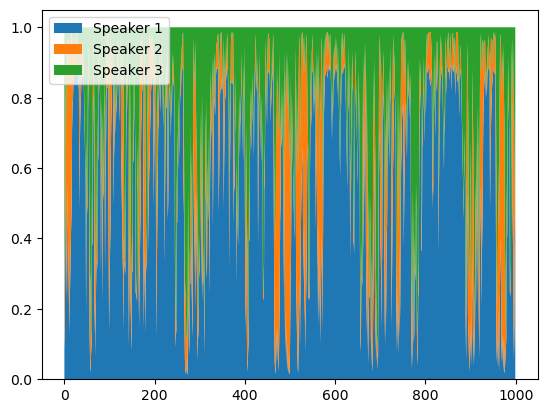

In [5]:

# transition probabilities between speakers
transition_dict_speaker = {"1": {"1": 0.9, "2": 0.05, "3": 0.05}, "2": {
    "1": 0.05, "2": 0.9, "3": 0.05}, "3": {"1": 0.05, "2": 0.05, "3": 0.9}}

# emission probabilities
probability_dict_phonemes = {
    "e": {"1": 0.1, "2": 0.4, "3": 0.5}, 
    "o": {"1": 0.4, "2": 0.1, "3": 0.5}, 
    "g": {"1": 0.5, "2": 0.4, "3": 0.1}, 
    "p": {"1": 0.5, "2": 0.4, "3": 0.1}, 
    "t": {"1": 0.4, "2": 0.1, "3": 0.5}, 
    "k": {"1": 0.1, "2": 0.4, "3": 0.5}, 
    "A": {"1": 0.5, "2": 0.3, "3": 0.2}}

# initial probabilities
initial_probabilities = {"1": 0.3, "2": 0.3, "3": 0.4}

# propability of each speaker speaking at each phoneme
probabilities = {"1": [], "2": [], "3": []}
for i in range(len(speech)):

    for speaker in probabilities:
        # first time step, consider initial probabilities
        if i == 0:
            probabilities[speaker].append(
                initial_probabilities[speaker]*probability_dict_phonemes[speech[i]][speaker])
        else:
            # sum of probabilities of possible transitions to current speaker
            transition_prob = sum([probabilities[speaker2][i-1]*transition_dict_speaker[speaker2][speaker] for speaker2 in probabilities])
            # probability of speaker saying current phoneme * probability of transition
            probabilities[speaker].append(probability_dict_phonemes[speech[i]][speaker]*transition_prob)

    # normalize probabilities
    total = sum([probabilities[speaker][i] for speaker in probabilities])
    for speaker in probabilities:
        probabilities[speaker][i] = probabilities[speaker][i]/total
        
            
                
                

# normalize probabilities
for i in range(len(speech)):
    total = sum([probabilities[speaker][i] for speaker in probabilities])
    for speaker in probabilities:
        probabilities[speaker][i] = probabilities[speaker][i]/total

# plot the probabilities using a stackplot
plt.stackplot(range(len(probabilities["1"])), probabilities["1"], probabilities["2"], probabilities["3"], labels=["Speaker 1", "Speaker 2", "Speaker 3"])
plt.legend(loc="upper left")
plt.show()

    


